# PRAVEER SAXENA BATCH NO 1814 




# Assignment No. 4

# Let's check the number of  images in our augmented training data and let us also check number of test images in each category

In [1]:
#importing the required libraries
import glob
import numpy as np

In [2]:
#Let us confirm the number of images in traing and test set
myPath_ts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/saree/'
saree_images_train = len(glob.glob1(myPath_ts,"*.jpg"))
print('The number of saree images in training_set is : ',saree_images_train)
myPath_tsh = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/shirt/'
shirt_images_train = len(glob.glob1(myPath_tsh,"*.jpg"))
print('The number of shirt images in training_set is : ',shirt_images_train)
myPath_tts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/tshirt/'
tshirt_images_train = len(glob.glob1(myPath_tts,"*.jpg"))
print('The number of tshirt images in training_set is : ',tshirt_images_train)

myPath_tts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/saree/'
saree_images_test = len(glob.glob1(myPath_tts,"*.jpg"))
print('The number of saree images in test_set is : ',saree_images_test)
myPath_ttsh = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/shirt/'
shirt_images_test = len(glob.glob1(myPath_ttsh,"*.jpg"))
print('The number of shirt images in test_set is : ',shirt_images_test)
myPath_ttts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/tshirt/'
tshirt_images_test = len(glob.glob1(myPath_ttts,"*.jpg"))
print('The number of tshirt images in test_set is : ',tshirt_images_test)

The number of saree images in training_set is :  700
The number of shirt images in training_set is :  700
The number of tshirt images in training_set is :  700
The number of saree images in test_set is :  19
The number of shirt images in test_set is :  19
The number of tshirt images in test_set is :  19


# BUILDING CNN MODEL 

In [3]:
#Import the required libraries for cnn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


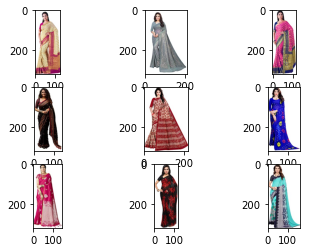

In [4]:
# plot saree photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/saree/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'saree-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

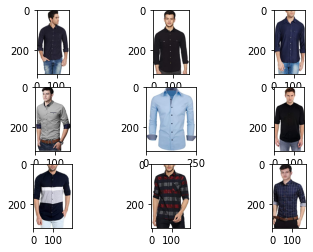

In [5]:
# plot shirt photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/shirt/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'shirt-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

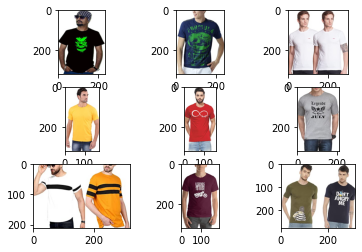

In [6]:
# plot tshirt photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/tshirt/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'tshirt-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Findings: We can see that the different images have different resolution/sizes, we need to normalize them

# Also converting all images to have one size i.e (64,64)

1. Important to note that we are using image datagenerator object to scale the image
2. We are not doing  any other image augmentation as we have done it manually

In [7]:
# we are creating all images to have one size i.e. (64,64)
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   
training_set = train_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2100 images belonging to 3 classes.


In [8]:
#Applying scaling on test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 57 images belonging to 3 classes.


# Creation of Convolution neural Network

In [9]:
def cnn_model():
    #Instantiating the Sequential class
    model = Sequential()

    # Adding 1st convolutional layer for feature extraction
    model.add(Conv2D(filters=32,kernel_size=3, padding ='same', activation='relu',input_shape= (64,64,3)))

    #Adding Maxpooling for downsampling
    model.add(MaxPool2D(pool_size=(2,2),strides=2))

    #Adding 2nd Convolutional layer for feature extraction
    model.add(Conv2D(filters=64,kernel_size=3,padding ='same', activation='relu'))

    #Adding Maxpooling for  downsampling
    model.add(MaxPool2D(pool_size=(2,2),strides=2))

    # Flatting the output of pooling layer
    model.add(Flatten())

    # Adding dropout to deactivate few neurons so that overfitting can be avoided
    model.add(Dropout(0.5))

    # Adding fully connected layer
    model.add(Dense(units=64,activation='relu'))

    #Further adding the dropout to avoid overfitting
    model.add(Dropout(0.5))
    model.add(Dense(units=3,activation='softmax'))
    return model

In [10]:
#Lets instantiate the model and check its summary
model = cnn_model()

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

# Creating callbacks

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [13]:
def callbacks():
    checkpoint = ModelCheckpoint('E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/fashioncnn.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
    earlystopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience= 5,
                              verbose=1,
                              mode='max',
                              restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=0.2,
                             patience=5,
                             verbose=1,
                             mode='max',
                             min_delta=0.0001)

    callbacks = [checkpoint,earlystopping,reduce_lr]
    return callbacks

# importing different optimizers

In [14]:
from  keras.optimizers import SGD,RMSprop,Adam,Nadam

# 1. SGD WITH MOMENTUM

In [15]:
SGDM = SGD(learning_rate=0.01, momentum=0.01,nesterov=False)

In [16]:
#Lets instantiate the created model and call backs
callbacks1 = callbacks()
model_1 = cnn_model()

# Compiling the created MODEL

In [17]:
model_1.compile(optimizer= SGDM,loss='categorical_crossentropy',metrics=['accuracy'])

# Training on Training data and testing on test data

In [18]:
model_1.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks1)

Epoch 1/20
66/66 [==============================] - 10s 159ms/step - loss: 1.0823 - accuracy: 0.3943 - val_loss: 1.0289 - val_accuracy: 0.4737

Epoch 00001: val_accuracy improved from -inf to 0.47368, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 10s 153ms/step - loss: 1.0017 - accuracy: 0.5233 - val_loss: 0.7717 - val_accuracy: 0.9298

Epoch 00002: val_accuracy improved from 0.47368 to 0.92982, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 3/20
66/66 [==============================] - 10s 155ms/step - loss: 0.8421 - accuracy: 0.6490 - val_loss: 0.4547 - val_accuracy: 0.9298

Epoch 00003: val_accuracy did not improve from 0.92982
Epoch 4/20
66/66 [==============================] - 11s 159ms/step - loss: 0.7236 - accuracy: 0.7100 - val_loss: 0.4478 - val_accuracy: 0.8421

Epoch 00004: val_accuracy did not improve from 0.92982
Epoch 5/20
66/66 

# PLOTTING THE LEARNING CURVES

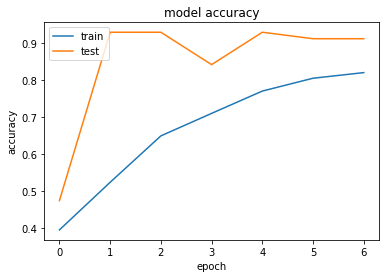

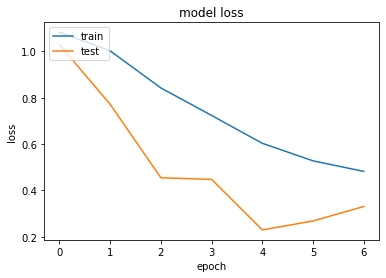

In [19]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_1.history.history['accuracy'])
plt.plot(model_1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_1.history.history['loss'])
plt.plot(model_1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2. Nesterov Accelerated Gradient Descent

In [20]:
NESTROV= SGD(learning_rate=0.01, momentum=0.01, nesterov= True)

In [21]:
#Instantiating the model and callback
callbacks2 = callbacks()
model_2 = cnn_model()

# Compiling the model

In [22]:
model_2.compile(optimizer= NESTROV,loss='categorical_crossentropy',metrics=['accuracy'])

# NOW TRAINING ON TRAIN DATA AND TESTING ON TEST DATA

In [23]:
model_2.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks2)

Epoch 1/20
66/66 [==============================] - 11s 161ms/step - loss: 1.0733 - accuracy: 0.4205 - val_loss: 0.9764 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 11s 164ms/step - loss: 0.9483 - accuracy: 0.5686 - val_loss: 0.6614 - val_accuracy: 0.8070

Epoch 00002: val_accuracy improved from 0.66667 to 0.80702, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 3/20
66/66 [==============================] - 11s 160ms/step - loss: 0.7932 - accuracy: 0.6562 - val_loss: 0.5212 - val_accuracy: 0.8772

Epoch 00003: val_accuracy improved from 0.80702 to 0.87719, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 4/20
66/66 [==============================] - 11s 160ms/step - loss: 0.6567 - accuracy: 0.7438 - val_loss: 0.3710 -

# PLOTTING THE LEARNING CURVES

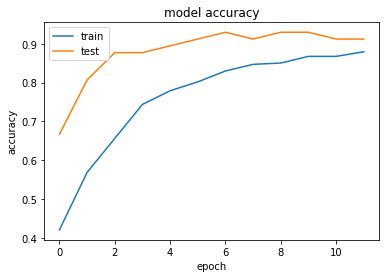

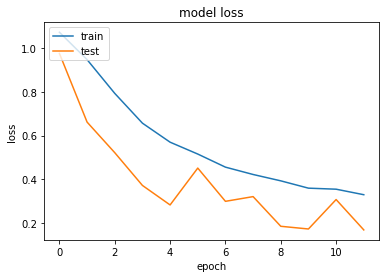

In [24]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_2.history.history['loss'])
plt.plot(model_2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3. RMSPROP

In [25]:
RMS= RMSprop(learning_rate=0.01)

In [26]:
#Instantiating the model and callback
callbacks3 = callbacks()
model_3 = cnn_model()

# Compiling the Model

In [27]:
model_3.compile(optimizer= RMS,loss='categorical_crossentropy',metrics=['accuracy'])

# Training and Testing

In [28]:
model_3.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks3)

Epoch 1/20
66/66 [==============================] - 13s 190ms/step - loss: 2.8988 - accuracy: 0.3529 - val_loss: 1.0454 - val_accuracy: 0.5439

Epoch 00001: val_accuracy improved from -inf to 0.54386, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 13s 190ms/step - loss: 1.4040 - accuracy: 0.5176 - val_loss: 0.5501 - val_accuracy: 0.8596

Epoch 00002: val_accuracy improved from 0.54386 to 0.85965, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 3/20
66/66 [==============================] - 12s 177ms/step - loss: 0.7109 - accuracy: 0.7243 - val_loss: 0.3955 - val_accuracy: 0.8246

Epoch 00003: val_accuracy did not improve from 0.85965
Epoch 4/20
66/66 [==============================] - 11s 160ms/step - loss: 0.6866 - accuracy: 0.7962 - val_loss: 0.3501 - val_accuracy: 0.8947

Epoch 00004: val_accuracy improved from 0.85965 to 0.89474, saving model

# PLOTTING THE LEARNING CURVES

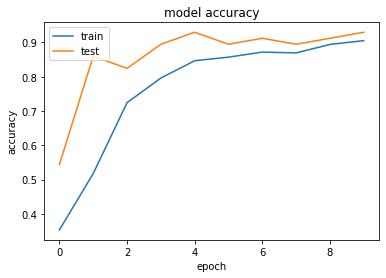

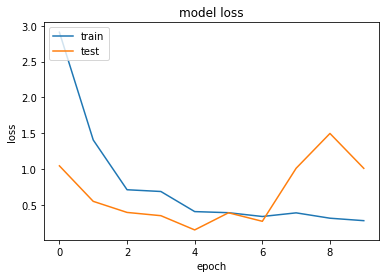

In [29]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_3.history.history['accuracy'])
plt.plot(model_3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_3.history.history['loss'])
plt.plot(model_3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4. Adam

In [40]:
ADAM = Adam(learning_rate=0.01)

In [41]:
#Instantiating the model and callback
callbacks4 = callbacks()
model_4 = cnn_model()

# compiling the model

In [42]:
model_4.compile(optimizer= ADAM,loss='categorical_crossentropy',metrics=['accuracy'])

# Training and Testing

In [43]:
model_4.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks4)

Epoch 1/20
66/66 [==============================] - 11s 167ms/step - loss: 1.1707 - accuracy: 0.4976 - val_loss: 0.6419 - val_accuracy: 0.7368

Epoch 00001: val_accuracy improved from -inf to 0.73684, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 11s 163ms/step - loss: 0.6576 - accuracy: 0.7205 - val_loss: 0.6851 - val_accuracy: 0.8596

Epoch 00002: val_accuracy improved from 0.73684 to 0.85965, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 3/20
66/66 [==============================] - 11s 166ms/step - loss: 0.5012 - accuracy: 0.8038 - val_loss: 0.3997 - val_accuracy: 0.8421

Epoch 00003: val_accuracy did not improve from 0.85965
Epoch 4/20
66/66 [==============================] - 11s 164ms/step - loss: 0.4727 - accuracy: 0.8057 - val_loss: 0.1687 - val_accuracy: 0.8596

Epoch 00004: val_accuracy did not improve from 0.85965
Epoch 5/20
66/66 

# PLOTTING THE LEARNING CURVES


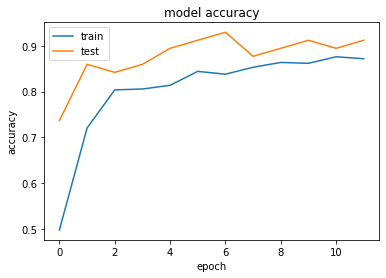

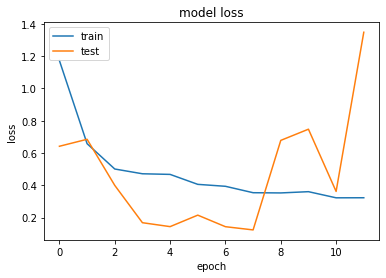

In [44]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_4.history.history['accuracy'])
plt.plot(model_4.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_4.history.history['loss'])
plt.plot(model_4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Nadam

In [45]:
NADAM = Nadam(learning_rate=0.01)

In [46]:
#Instantiating the model and callback
callbacks5 = callbacks()
model_5 = cnn_model()

# compiling the model

In [47]:
model_5.compile(optimizer= NADAM,loss='categorical_crossentropy',metrics=['accuracy'])

# TRAINING AND TESTING

In [48]:
model_5.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks5)

Epoch 1/20
66/66 [==============================] - 11s 174ms/step - loss: 1.2511 - accuracy: 0.4629 - val_loss: 0.7741 - val_accuracy: 0.6491

Epoch 00001: val_accuracy improved from -inf to 0.64912, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 11s 169ms/step - loss: 0.9647 - accuracy: 0.6495 - val_loss: 0.7353 - val_accuracy: 0.7895

Epoch 00002: val_accuracy improved from 0.64912 to 0.78947, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 3/20
66/66 [==============================] - 11s 169ms/step - loss: 0.5874 - accuracy: 0.7414 - val_loss: 0.5778 - val_accuracy: 0.8947

Epoch 00003: val_accuracy improved from 0.78947 to 0.89474, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 4/20
66/66 [==============================] - 11s 170ms/step - loss: 0.4525 - accuracy: 0.8076 - val_loss: 0.4806 -

# PLOTTING THE LEARNING CURVES

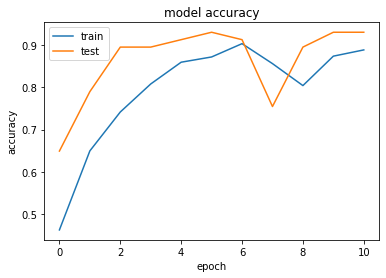

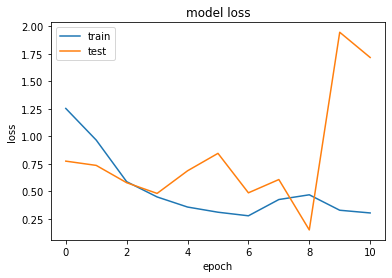

In [49]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_5.history.history['accuracy'])
plt.plot(model_5.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_5.history.history['loss'])
plt.plot(model_5.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Now lets check the behaviour of one of the optimizers(Nadam) by changing the learning rate



# Let us select the Nadam optimizer and set the learning rate to be 0.001 instead of 0.01

In [50]:
NADAM_C = Nadam(learning_rate=0.001)

In [51]:
#Instantiating the model and callback
callbacks6 = callbacks()
model_6 = cnn_model()

In [52]:
model_6.compile(optimizer= NADAM_C,loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model_6.fit(x=training_set,validation_data=test_set,epochs=20,callbacks =callbacks6)

Epoch 1/20
66/66 [==============================] - 12s 174ms/step - loss: 0.7182 - accuracy: 0.6781 - val_loss: 0.3970 - val_accuracy: 0.9123

Epoch 00001: val_accuracy improved from -inf to 0.91228, saving model to E:\DataTrained\Convolutional Neural Networks\fashiondataset/fashioncnn.h5
Epoch 2/20
66/66 [==============================] - 12s 175ms/step - loss: 0.4047 - accuracy: 0.8467 - val_loss: 0.2383 - val_accuracy: 0.8947

Epoch 00002: val_accuracy did not improve from 0.91228
Epoch 3/20
66/66 [==============================] - 12s 175ms/step - loss: 0.2772 - accuracy: 0.8981 - val_loss: 0.2206 - val_accuracy: 0.9123

Epoch 00003: val_accuracy did not improve from 0.91228
Epoch 4/20
66/66 [==============================] - 11s 174ms/step - loss: 0.2214 - accuracy: 0.9143 - val_loss: 0.2713 - val_accuracy: 0.9123

Epoch 00004: val_accuracy did not improve from 0.91228
Epoch 5/20
66/66 [==============================] - 11s 173ms/step - loss: 0.2080 - accuracy: 0.9252 - val_loss:

# LETS PLOT THE LEARNING CURVES

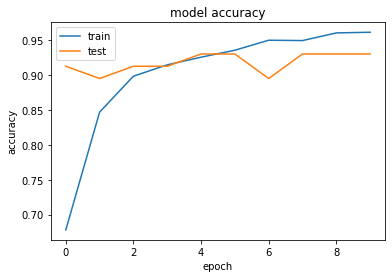

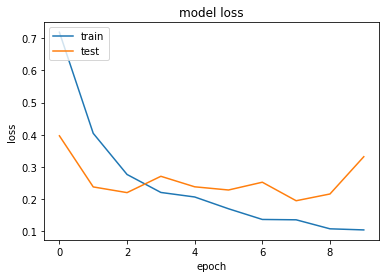

In [54]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_6.history.history['accuracy'])
plt.plot(model_6.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_6.history.history['loss'])
plt.plot(model_6.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# We can clearly observe from the above graph that by reducing the learning rate, the fluctuations in accuracy and loss have been reduced.

# Similarly we can experiment by changing the learning rates in different optimizers